In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [175]:
train = pd.read_csv('C:/Users/Admin/Documents/Competition Files/Loan Eligibility Prediction Datasets/train_ctrUa4K.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [176]:
test = pd.read_csv('C:/Users/Admin/Documents/Competition Files/Loan Eligibility Prediction Datasets/test_lAUu6dG.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [177]:
train_original = train.copy()
test_original = test.copy()

In [178]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [179]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [181]:
train.shape

(614, 13)

In [182]:
test.shape

(367, 12)

In [183]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

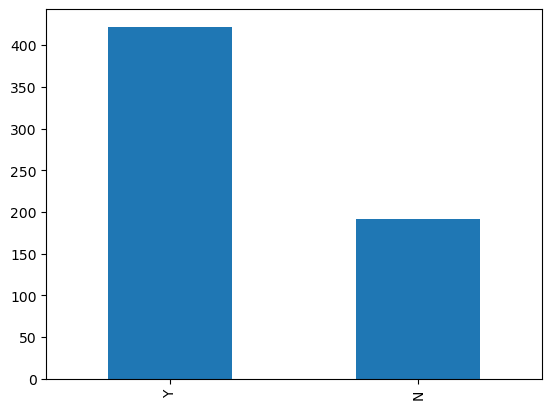

In [184]:
train.Loan_Status.value_counts().plot.bar()

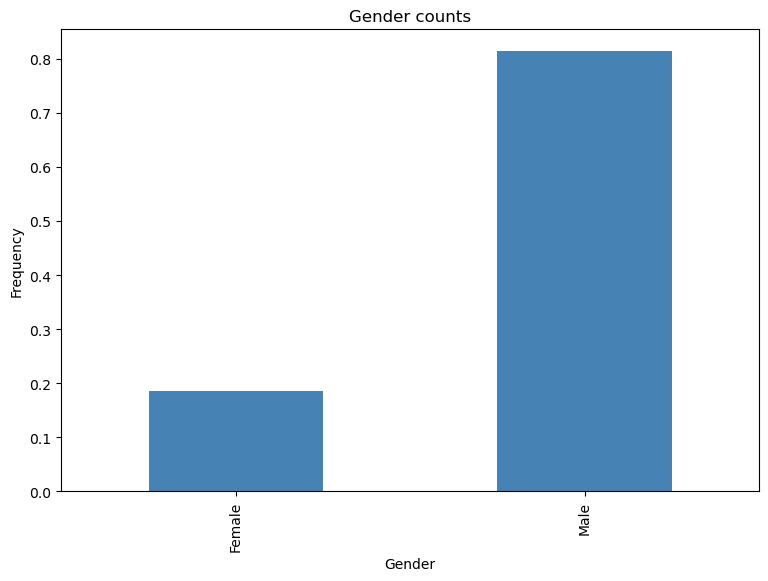

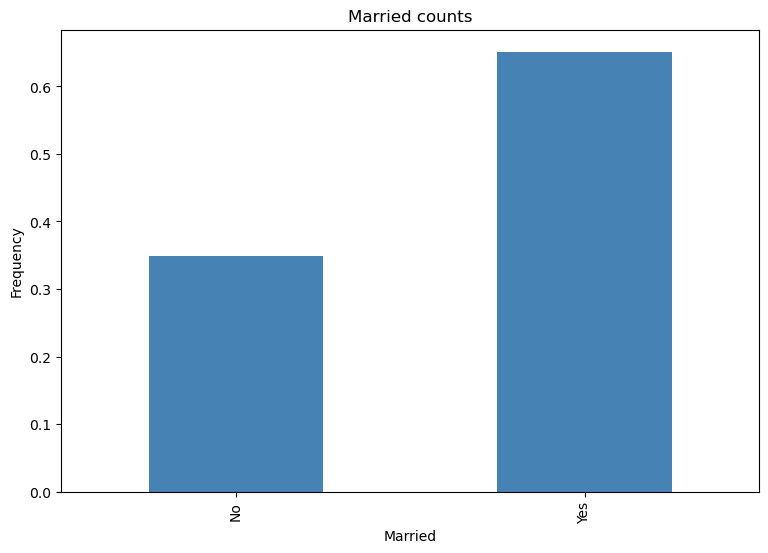

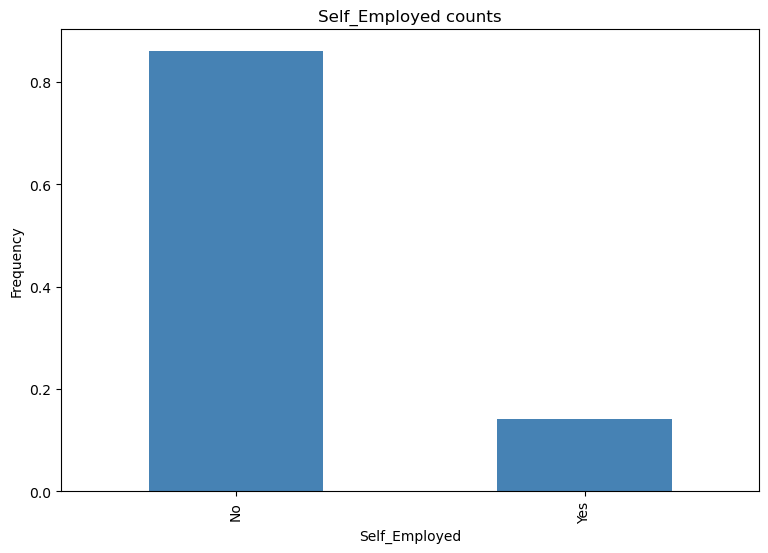

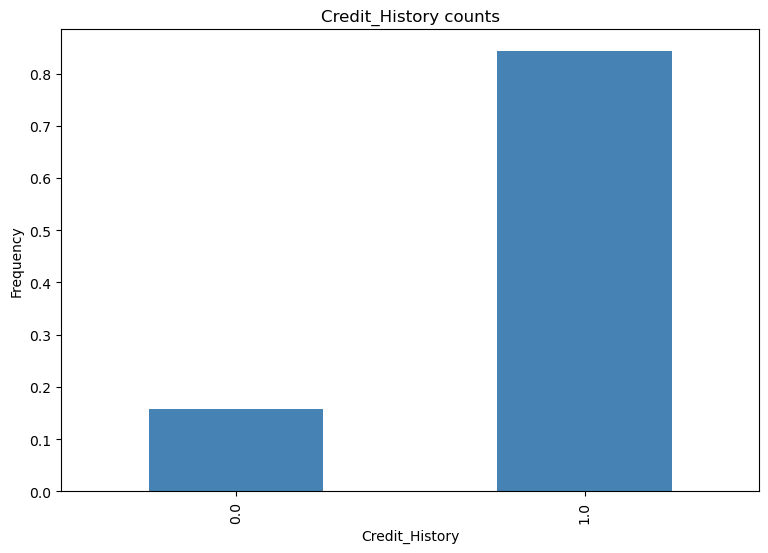

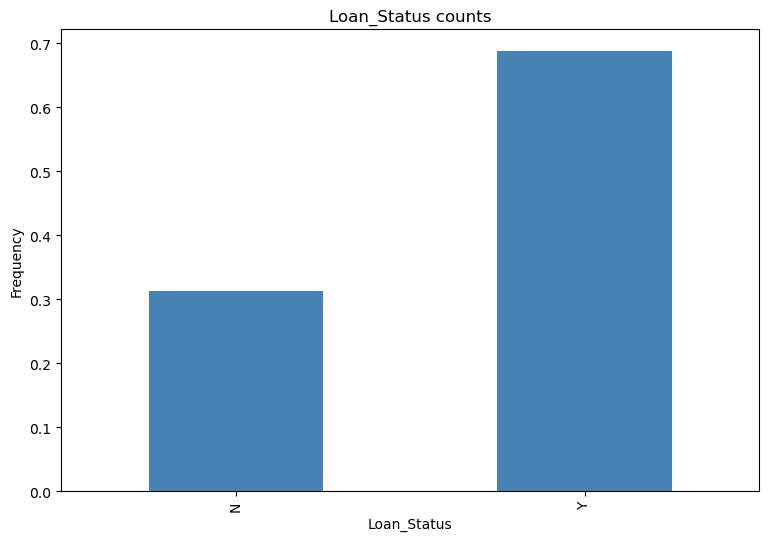

In [185]:
cat_feat = ['Gender','Married','Self_Employed','Credit_History','Loan_Status']

for col in cat_feat:
    counts = train[col].value_counts(normalize=True).sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax=ax,color='steelblue')
    ax.set_title(col + ' '+ 'counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

In [186]:
ord_feat=['Dependents','Education','Property_Area']


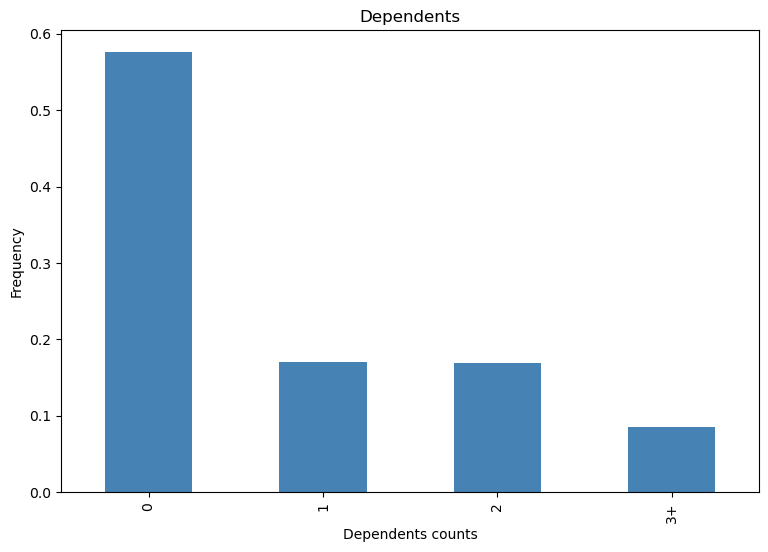

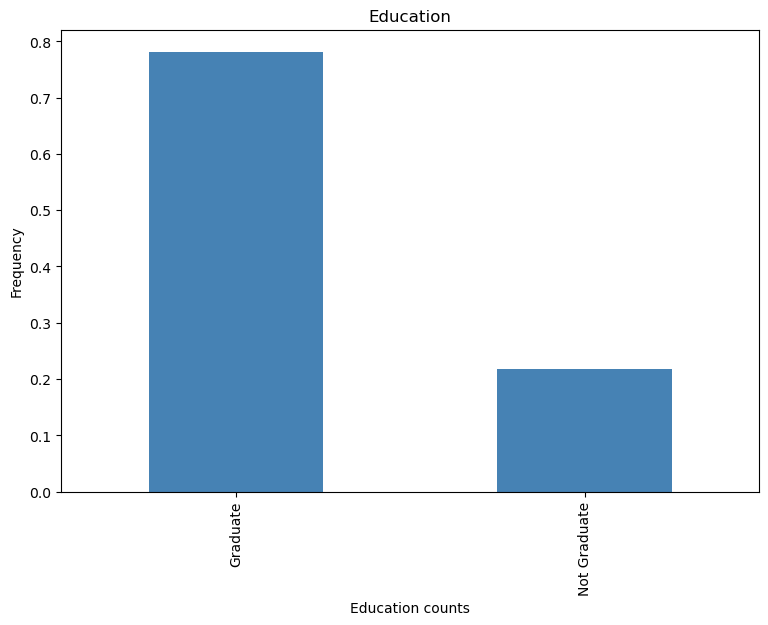

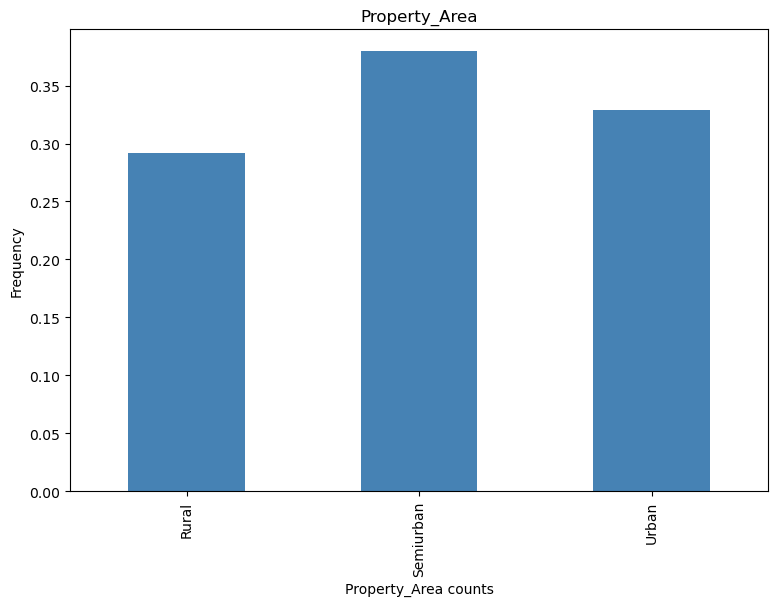

In [187]:
for col in ord_feat:
    counts = train[col].value_counts(normalize=True).sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax=ax,color='steelblue')
    ax.set_title(col)
    ax.set_xlabel(col+' '+'counts')
    ax.set_ylabel("Frequency")
plt.show()

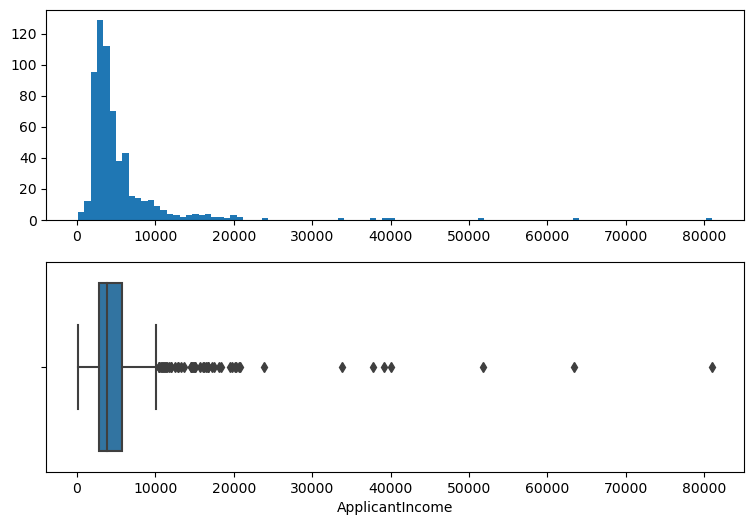

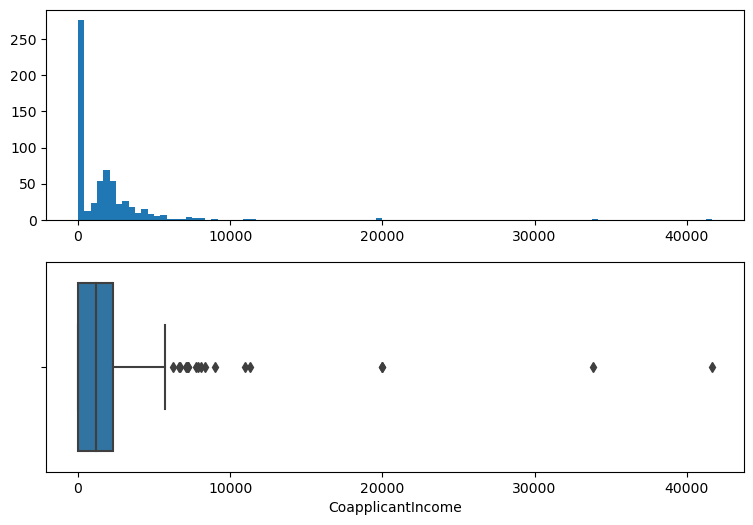

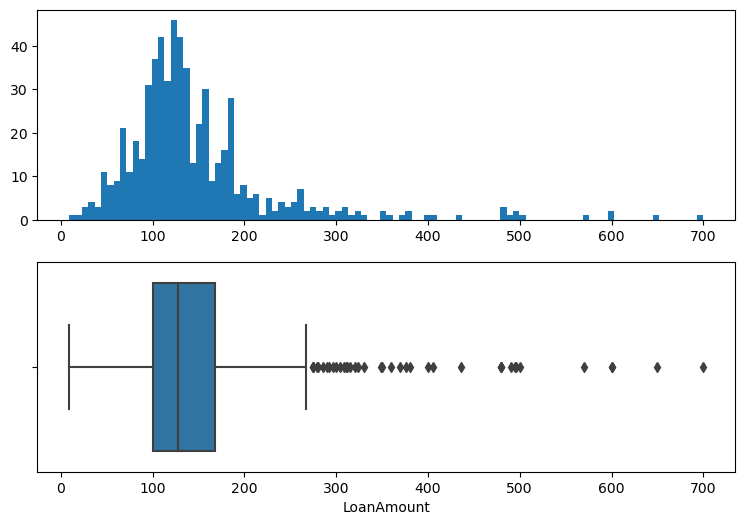

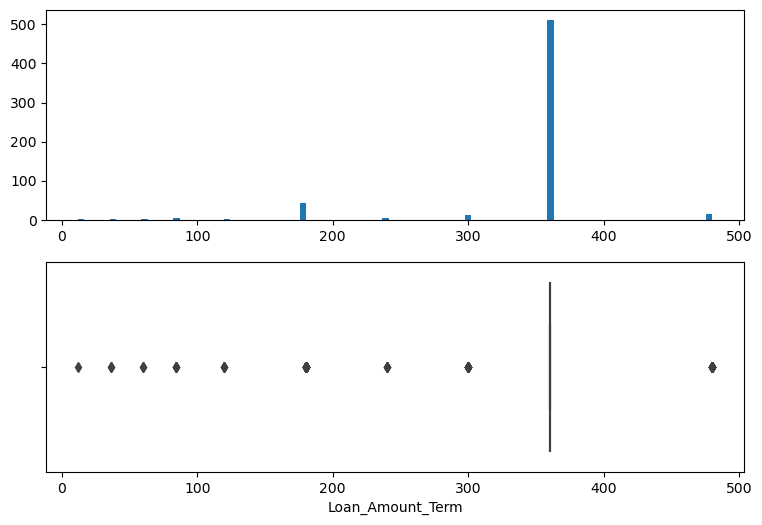

In [188]:
num_feat = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']


for col in num_feat:
    feature = train[col]
    fig,ax = plt.subplots(2,1,figsize=(9,6))
    ax[0].hist(feature,bins=100)
    sns.boxplot(feature,x=col,ax=ax[1])


fig.show()

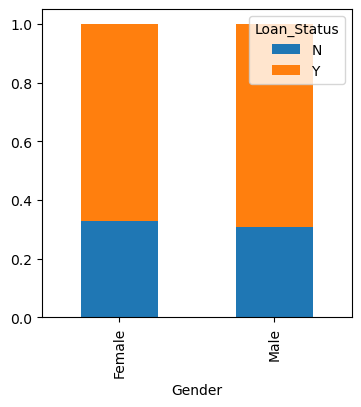

In [189]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

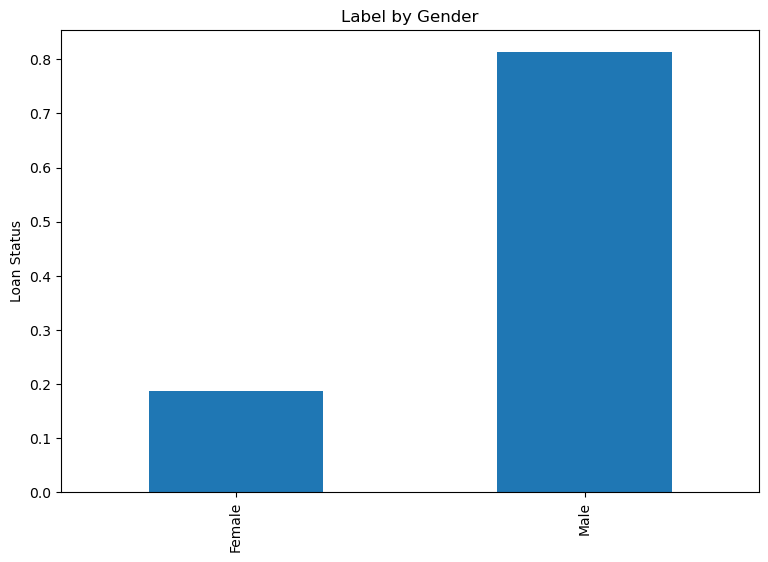

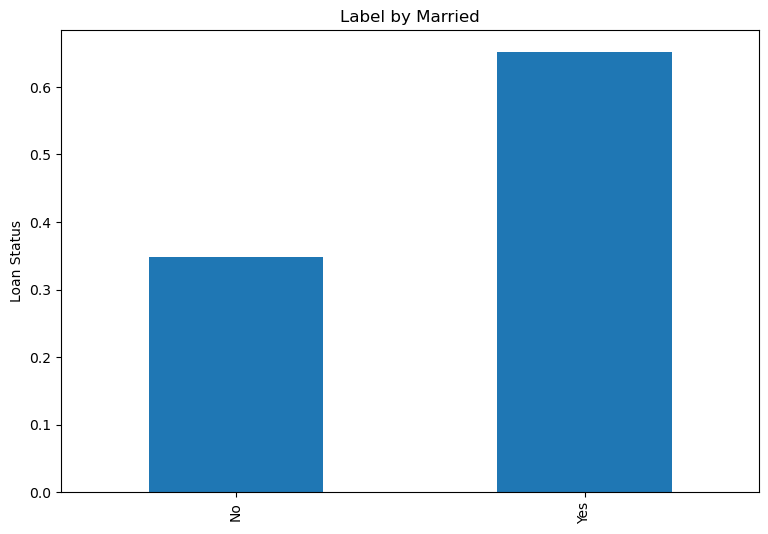

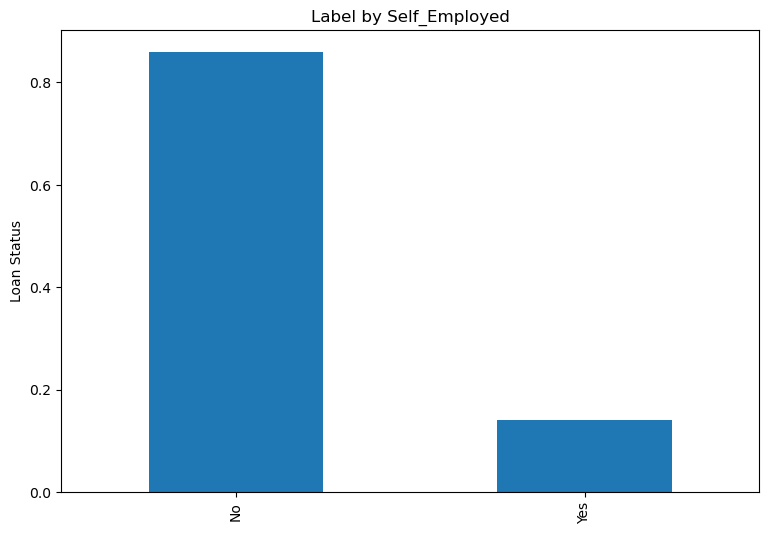

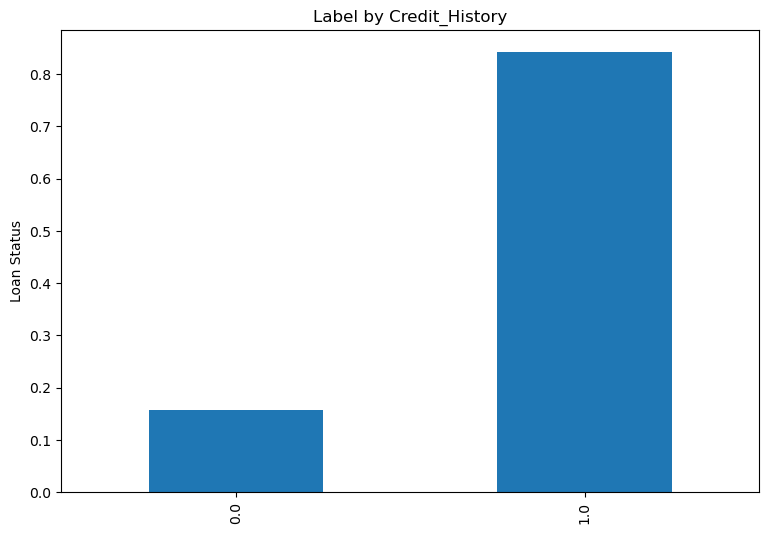

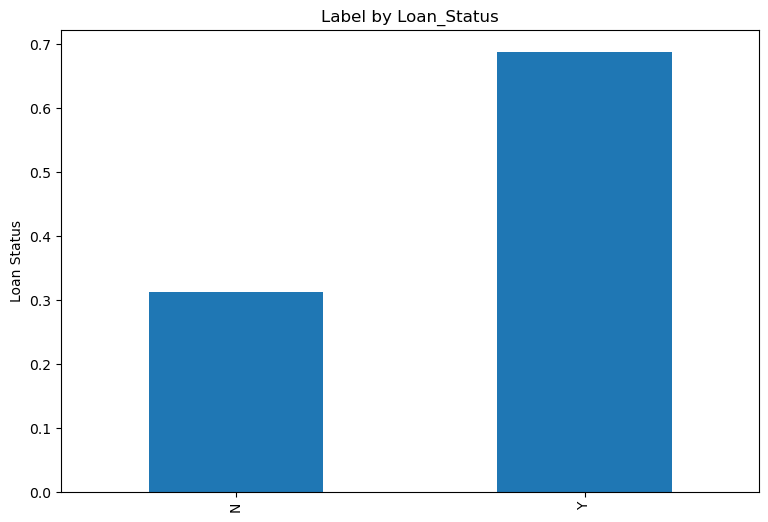

In [190]:
for col in cat_feat:
    counts = train[col].value_counts(normalize=True).sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(x = col , y = train.Loan_Status, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Loan Status")
plt.show()

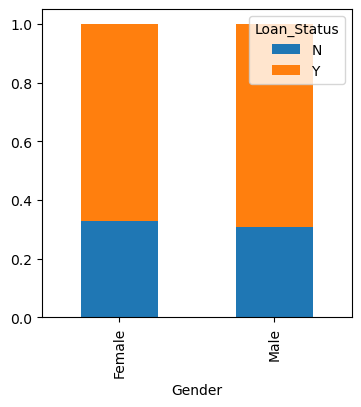

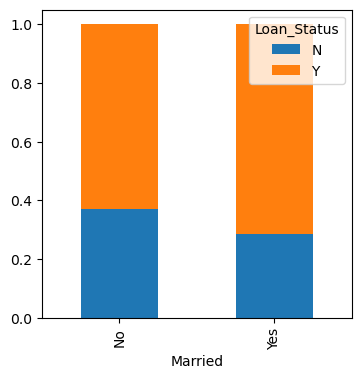

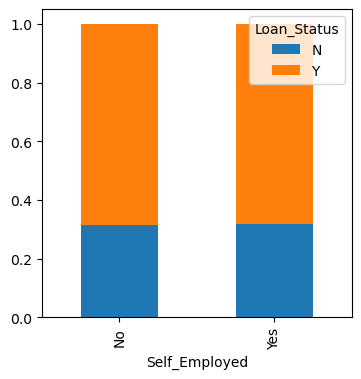

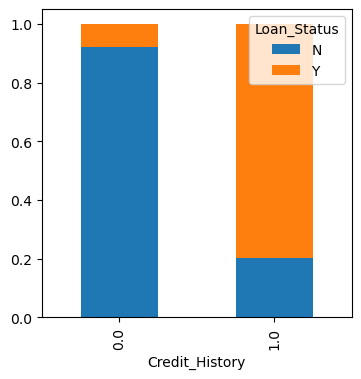

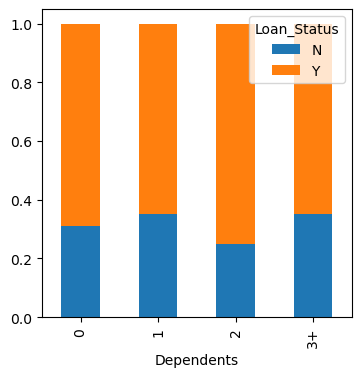

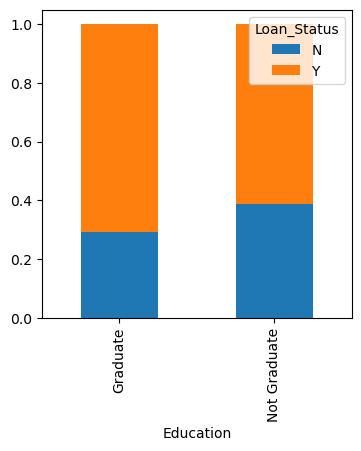

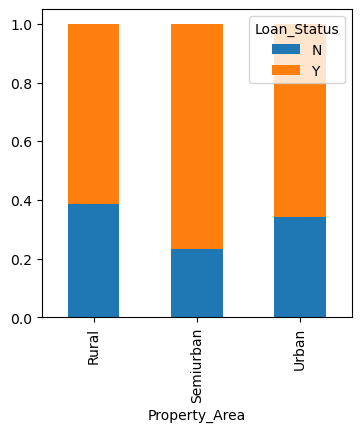

In [191]:
Gender = pd.crosstab(train.Gender,train.Loan_Status)
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Self_Employed = pd.crosstab(train.Self_Employed,train.Loan_Status)
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Credit_History = pd.crosstab(train.Credit_History,train.Loan_Status)
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

'Dependents','Education','Property_Area'

Dependents = pd.crosstab(train.Dependents,train.Loan_Status)
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Education = pd.crosstab(train.Education,train.Loan_Status)
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Property_Area = pd.crosstab(train.Property_Area,train.Loan_Status)
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()



<AxesSubplot:xlabel='Loan_Status'>

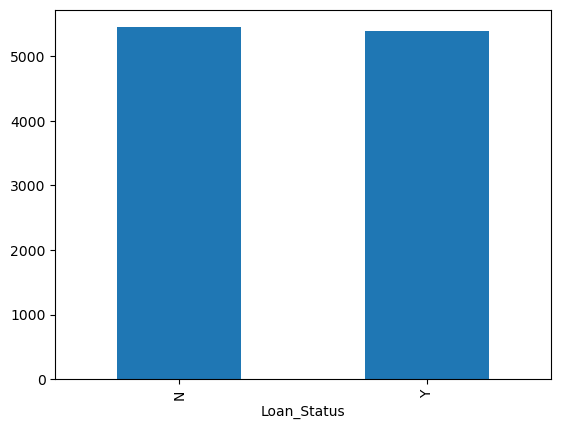

In [192]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [193]:
train.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

Text(0, 0.5, 'Percentage')

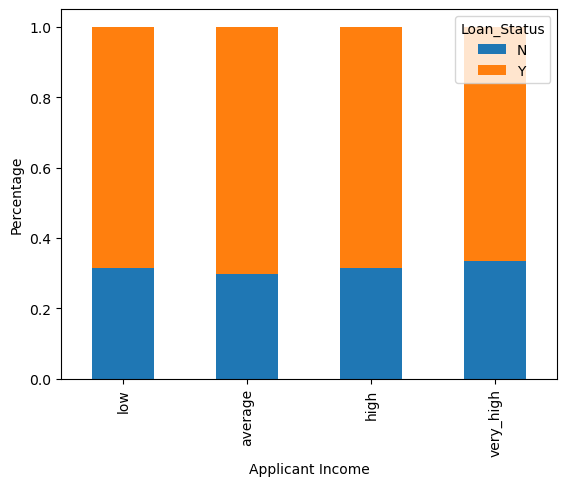

In [194]:
bins = [0,2500,4000,6000,81000]
groups = ['low','average','high','very_high']

train['Income_Bin'] = pd.cut(x=train['ApplicantIncome'],bins=bins,labels=groups)
Income_Bin = pd.crosstab(train.Income_Bin,train.Loan_Status)
Income_Bin.div(Income_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

In [195]:
train.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

Text(0, 0.5, 'Percentage')

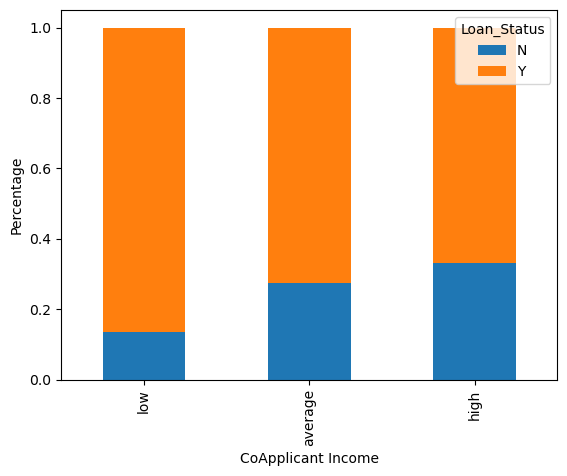

In [196]:
bins = [0,1000,3000,42000]
groups = ['low','average','high',]

train['Co_Income_Bin'] = pd.cut(x=train['CoapplicantIncome'],bins=bins,labels=groups)
Co_Income_Bin = pd.crosstab(train.Co_Income_Bin,train.Loan_Status)
Co_Income_Bin.div(Co_Income_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoApplicant Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

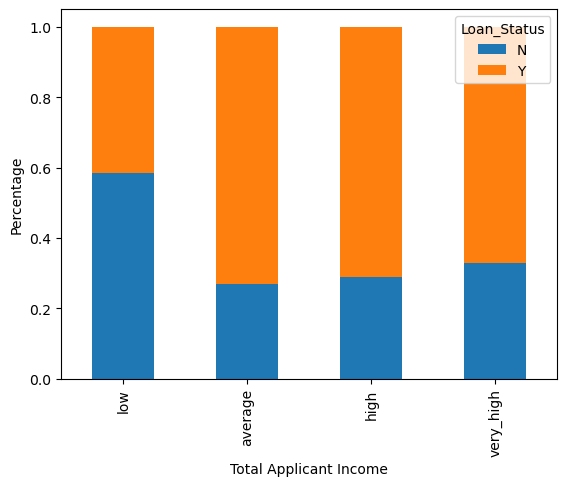

In [197]:
bins = [0,2500,4000,6000,81000]
groups = ['low','average','high','very_high']
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['Total_Income_Bin'] = pd.cut(x=train['Total_Income'],bins=bins,labels=groups)
Total_Income_Bin = pd.crosstab(train.Total_Income_Bin,train.Loan_Status)
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total Applicant Income')
plt.ylabel('Percentage')

In [198]:
train.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

Text(0, 0.5, 'Percentage')

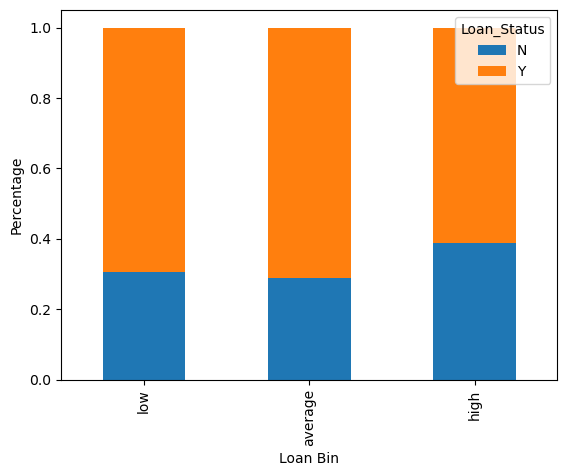

In [199]:
bins = [0,100,200,700]
groups = ['low','average','high']

train['Loan_Bin'] = pd.cut(x=train['LoanAmount'],bins=bins,labels=groups)
Loan_Bin = pd.crosstab(train.Loan_Bin,train.Loan_Status)
Loan_Bin.div(Loan_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Loan Bin')
plt.ylabel('Percentage')

In [200]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Bin', 'Co_Income_Bin', 'Total_Income', 'Total_Income_Bin',
       'Loan_Bin'],
      dtype='object')

In [201]:
train=train.drop(['Income_Bin', 'Income_Bin', 'Co_Income_Bin', 'Total_Income',
       'Total_Income_Bin', 'Loan_Bin'],axis=1)

train.Dependents

In [202]:
train.Dependents.replace('3+',3,inplace=True)
test.Dependents.replace('3+',3,inplace=True)
train.Loan_Status.replace('Y',1,inplace=True)
train.Loan_Status.replace('N',0,inplace=True)

In [203]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

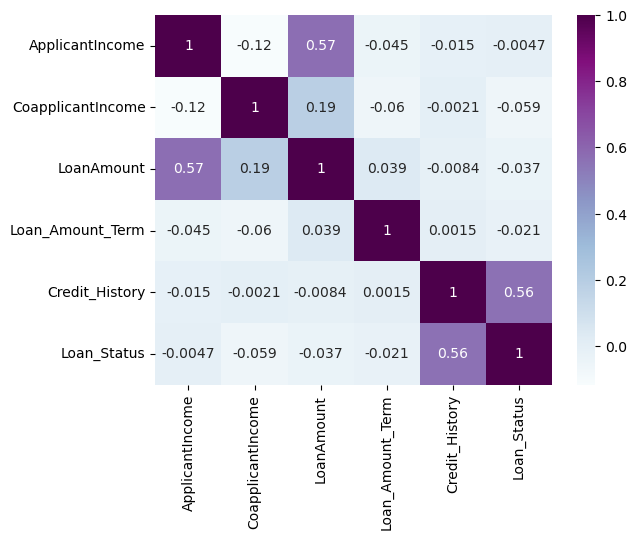

In [204]:
sns.heatmap(train.corr(),cmap='BuPu',annot=True)

In [205]:
train[train.columns[train.isnull().any()]].isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [206]:
miss_cat_feat = ['Gender','Married','Dependents','Self_Employed','Credit_History']

In [207]:
for col in miss_cat_feat:
    train[col].fillna(train[col].mode()[0],inplace=True)

In [208]:
for col in miss_cat_feat:
    test[col].fillna(test[col].mode()[0],inplace=True)

In [209]:
train[train.columns[train.isnull().any()]].isnull().sum()

LoanAmount          22
Loan_Amount_Term    14
dtype: int64

In [210]:
test[test.columns[test.isnull().any()]].isnull().sum()

LoanAmount          5
Loan_Amount_Term    6
dtype: int64

In [211]:
train['Loan_Amount_Term'].fillna(train.Loan_Amount_Term.mode()[0],inplace=True)

In [212]:
test['Loan_Amount_Term'].fillna(test.Loan_Amount_Term.mode()[0],inplace=True)

In [213]:
train.LoanAmount.fillna(train.LoanAmount.median(),inplace=True)

In [214]:
test.LoanAmount.fillna(test.LoanAmount.median(),inplace=True)

In [215]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [216]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2ea755732b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ea7554d9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ea7554d640>],
 'medians': [<matplotlib.lines.Line2D at 0x2ea75560a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ea755606a0>],
 'means': []}

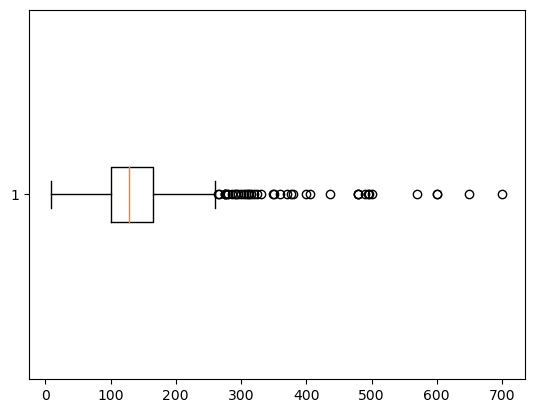

In [217]:
plt.boxplot(train.LoanAmount,vert=False)

In [218]:
train['LoanAmountLog'] = np.log(train.LoanAmount)

test['LoanAmountLog'] = np.log(test.LoanAmount)

<AxesSubplot:>

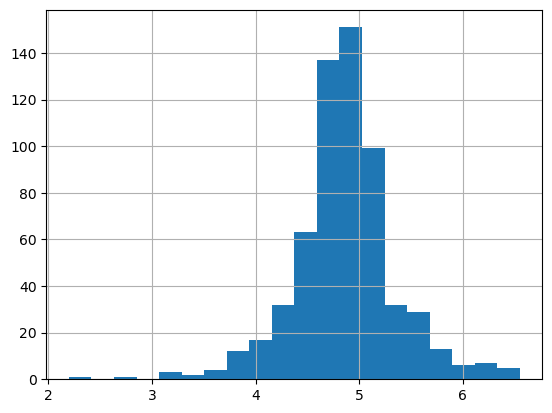

In [219]:
train.LoanAmountLog.hist(bins=20)

In [220]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)


In [221]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)


In [222]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status


In [223]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3)

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=1/0.01,solver='liblinear').fit(X_train,y_train)
predictions = model.predict(X_val)

print('Accuracy_score:',accuracy_score(y_val,predictions))

Accuracy_score: 0.7837837837837838


In [225]:
from sklearn.metrics import classification_report

print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        64
           1       0.75      1.00      0.86       121

    accuracy                           0.78       185
   macro avg       0.88      0.69      0.70       185
weighted avg       0.84      0.78      0.75       185



In [226]:
pred_test = model.predict(test)

In [227]:
submission = pd.read_csv('C:/Users/Admin/Documents/Competition Files/Loan Eligibility Prediction Datasets/sample_submission_49d68Cx.csv')


In [228]:
submission[submission['Loan_Status']=='N']



,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [229]:
submission.Loan_Status = pred_test
submission.Loan_ID = test_original.Loan_ID

In [230]:
submission.Loan_Status.replace(0,'N',inplace=True)
submission.Loan_Status.replace(1,'Y',inplace=True)

In [232]:
y_scores = model.predict_proba(X_val)

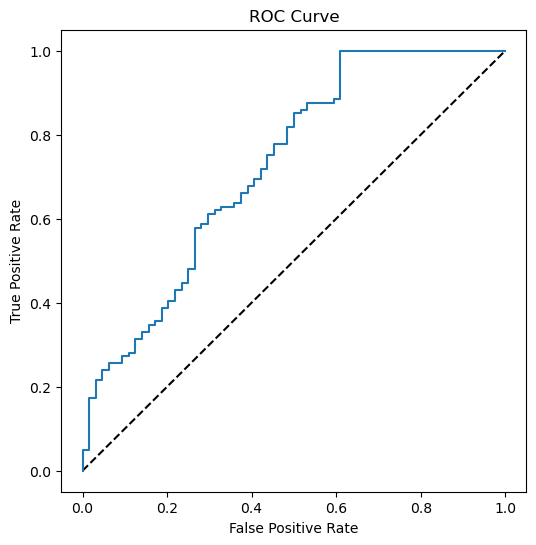

In [233]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_val,y_scores[:,1])

fig = plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [234]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_val,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.7266270661157025


In [253]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('C:/Users/Admin/Documents/Competition Files/Loan Eligibility Prediction Datasets/submission.csv')